<a href="https://colab.research.google.com/github/AppleBoiy/intro-to-machine-learning/blob/main/preprocess/imputation_of_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Imputation of Missing Values?

Imputation is the process of replacing missing data in a dataset with estimated values. This ensures that the dataset remains complete and can be used for analysis or modeling without removing rows or columns with missing values, which could lead to a loss of valuable information.

## Why is Imputation Important?

1.	Preserves Data:
  *	Instead of dropping rows or columns with missing values, imputation allows you to fill in gaps while retaining as much data as possible.
2.	Improves Model Performance:
  *	Machine learning algorithms typically cannot handle missing data. Imputation makes the dataset usable.
3.	Avoids Bias:
  *	Removing missing data may skew the dataset or introduce bias, especially if the missingness is not random.
4.	Maintains Data Integrity:
  *	Prevents issues like inconsistencies or errors in downstream analysis.

## Types of Missing Data

1.	MCAR (Missing Completely at Random):
  *	The missingness is unrelated to the data (e.g., a data collection error).
2.	MAR (Missing at Random):
  *	The missingness depends on observed data but not the missing data itself.
3.	MNAR (Missing Not at Random):
  *	The missingness depends on the missing data itself (e.g., people not reporting income because it’s high).

## Methods of Imputation

1.	Simple Imputation:
  *	**Mean Imputation**: Replace missing values with the mean of the column.
  *	**Median Imputation**: Replace with the median (useful for skewed data).
  *	Mode Imputation: Replace with the mode (for categorical data).
2.	Advanced Imputation:
  * **K-Nearest Neighbors (KNN)**: Uses values from the nearest neighbors to estimate missing data.
  * **Regression Imputation**: Predicts missing values using a regression model based on other features.
  * **Iterative Imputation**: Estimates missing values multiple times using models until convergence.
  *	**Deep Learning-Based Imputation**: Uses neural networks to fill missing values.
3.	Domain-Specific Imputation:
  *	Fill in missing values using a default value or domain knowledge.

# Step-by-Step Example: Imputation with Python

Let’s demonstrate **mean**, **median**, and **mode imputation** using the real-world **Titanic dataset**.

### Utils

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram_with_counts(df, column_name, bins=10, color='skyblue'):
    # Calculate histogram counts and bin edges
    counts, bin_edges, patches = plt.hist(df[column_name], bins=bins, color=color, edgecolor='black')

    # Display total count on top of each bar
    for count, bin_edge in zip(counts, bin_edges):
        if count > 0:
            plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, str(int(count)), ha='center', va='bottom')

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'{column_name} Distribution')

    # Show the plot
    plt.show()


## Step 1: Import Libraries

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

## Step 2: Load the Titanic Dataset

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [ ]:
# Inspect missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Step 3: Impute Missing Values


1.	**Impute** Age Using **Mean**:

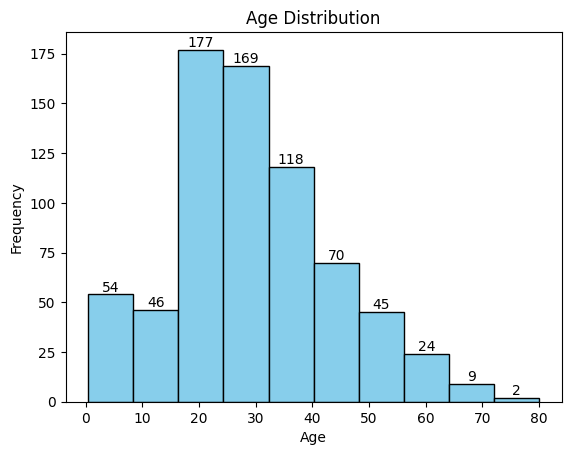

In [ ]:
plot_histogram_with_counts(df, 'Age', bins=10)

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
df['Age'] = mean_imputer.fit_transform(df[['Age']])

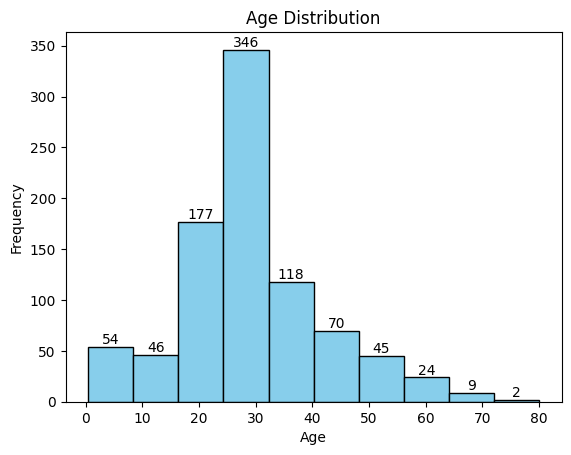

In [ ]:
plot_histogram_with_counts(df, 'Age', bins=10)

2.	**Impute** Embarked Using **Mode (Categorical Data)**:

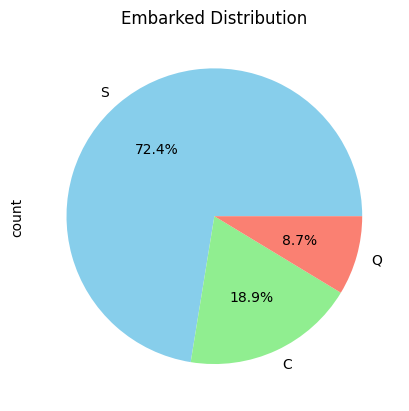

In [ ]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Embarked Distribution')
plt.show()

In [ ]:
# Impute 'Embarked' using the most frequent value (mode)
mode_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = mode_imputer.fit_transform(df[['Embarked']]).ravel()

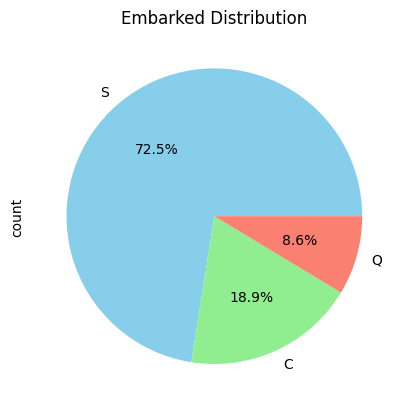

In [ ]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Embarked Distribution')
plt.show()

Explanation:

*	fit_transform() outputs a 2D array because it is designed to work with multiple columns.
*	.ravel() or .flatten() converts the 2D array to a 1D array, which can be assigned back to a single column.


3.	**Impute** Cabin Using a **Placeholder**:
	*	Since Cabin has many missing values, we can fill with **"Unknown"**.

In [ ]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

## Step 4: Verify Imputation

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


All missing values have been successfully imputed.

# Choosing an Imputation Method

Data Type |	Recommended Method
--- | ---
Numerical (continuous)	| Mean, Median, Regression, or KNN
Numerical (skewed) |	Median
Categorical	| Mode, KNN, or Domain-Specific Value
Large Missing Proportion	| Drop column (if appropriate) or use **“Unknown”**

## Limitations of Imputation

1.	Introduces Bias:
  *	Simple methods like mean imputation may distort statistical properties.
2.	Over-Simplification:
  *	Advanced relationships between features and the target variable may not be captured.
3.	Risk of Overfitting:
  *	Model-based imputations (e.g., regression, KNN) can overfit the dataset.
4.	Not Suitable for All Missingness Types:
  *	MNAR requires careful handling, often needing external data or assumptions.

## Conclusion

Imputation is an essential tool for handling missing data effectively. Choosing the right method depends on the nature of the data, the amount of missingness, and the problem domain.